# CubicGalileonEmu

> GP emulator for boost factor in cubic Galileon gravity model

Modified Gravity emulator for boost in the dark matter power spectra

## Install (for development, not production)

```sh
git clone https://github.com/nesar/CubicGalileonEmu.git
cd CubicGalileonEmu/
pip install -e '.[dev]'
```

## Basic rundown

### A few imports 

In [1]:
from CubicGalileonEmu.load import *
from CubicGalileonEmu.viz import *
from CubicGalileonEmu.pca import *
from CubicGalileonEmu.gp import *
from CubicGalileonEmu.emu import *
from CubicGalileonEmu.mcmc import *

import pandas as pd
import numpy as np
import matplotlib.pylab as plt


if_train_all = True ## Re-train all the models. Time-consuming. 
if_mcmc_all = False  ## Full MCMC run. Time-consuming. 
if_savefig = False

### Loading files

In [2]:
Bk_all, k_all, z_all = load_boost_data()
Bk_lin_all, _, _ = load_boost_data_lin()
p_all = load_params()

### A few plotting routines

#### Experimental design

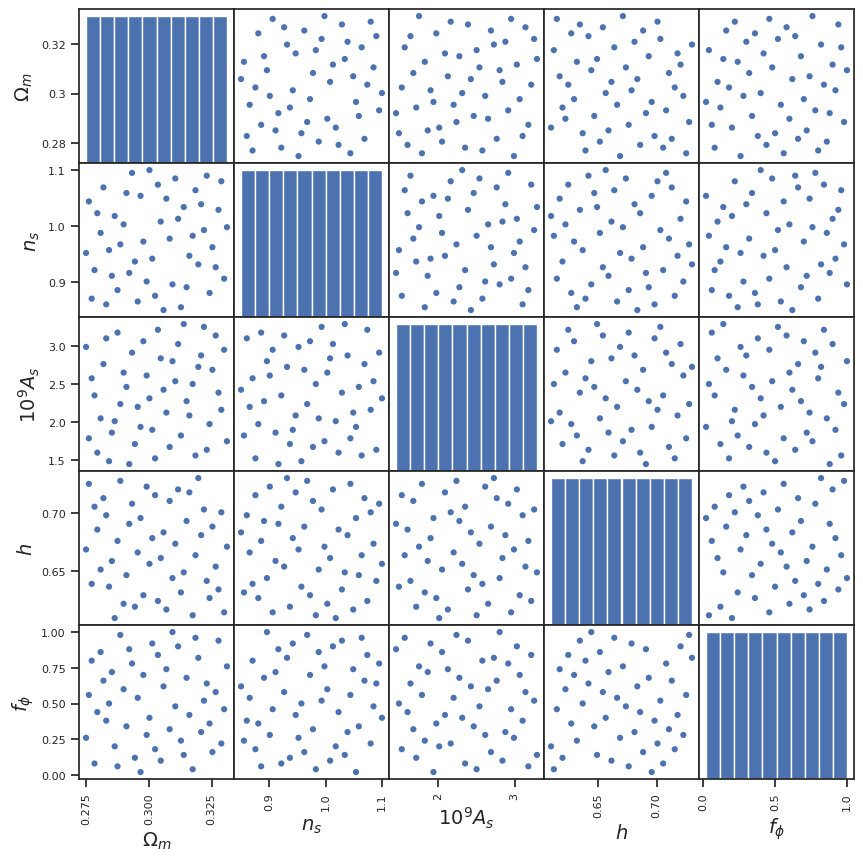

In [3]:
df_train_a = pd.DataFrame(p_all, columns=PARAM_NAME)
colors = ['b']*p_all.shape[0]
# colors = ['b']*num_sims + ['r']*num_sims_test
plot_scatter_matrix(df_train_a, colors);


#### Boost metrics colored by cosmology parameters

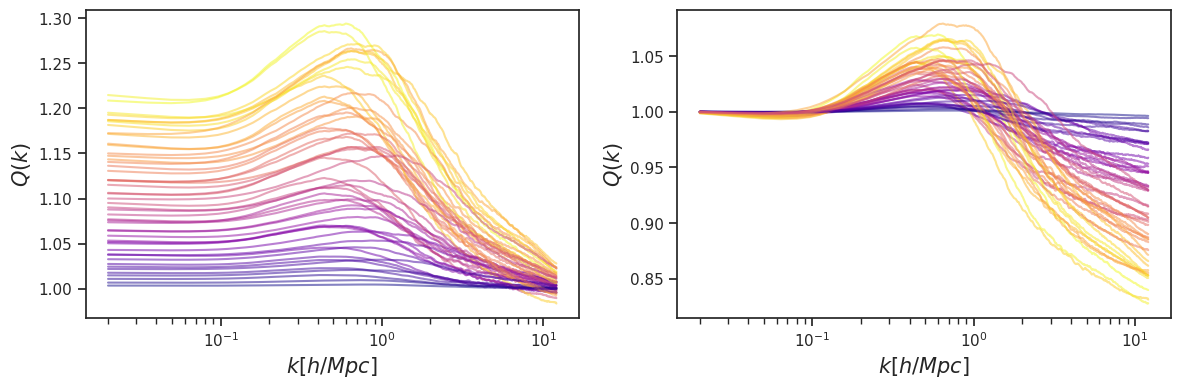

In [4]:
color_by_index = 4
z_index = 0

f, ax = plt.subplots(1, 2, figsize=(14, 4))

plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Bk_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$Q(k)$', 
                            PARAM_NAME[color_by_index], ax=ax[0]);

plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Bk_all[:, z_index, :]/Bk_lin_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$Q(k)$', 
                            PARAM_NAME[color_by_index], ax=ax[1]);

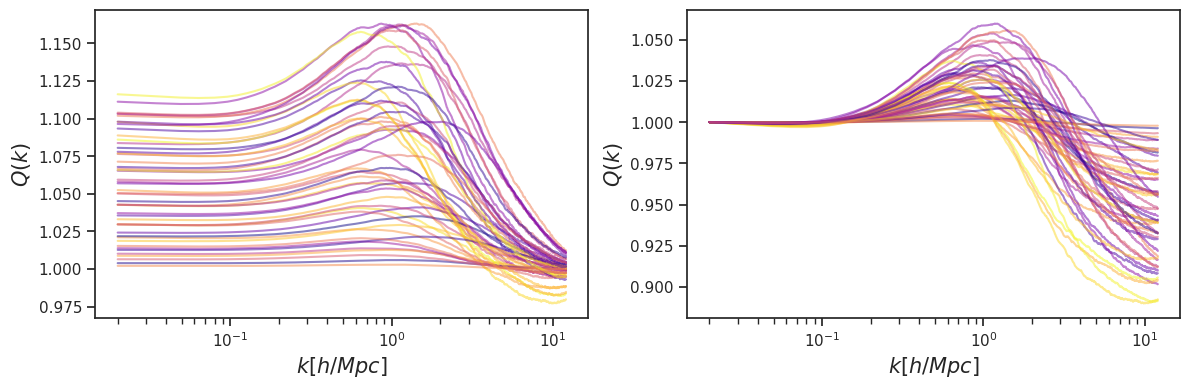

In [5]:
#| hide 

color_by_index = 3
z_index = 21

f, ax = plt.subplots(1, 2, figsize=(14, 4))


plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Bk_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$Q(k)$', 
                            PARAM_NAME[color_by_index],
                            ax=ax[0]);

plot_lines_with_param_color(p_all[:, color_by_index], 
                            k_all, 
                            Bk_all[:, z_index, :]/Bk_lin_all[:, z_index, :], 
                            'Training data, z=' + str(z_all[z_index]), 
                            r'$k [h/Mpc]$', 
                            r'$Q(k)$', 
                            PARAM_NAME[color_by_index],
                            ax=ax[1]);

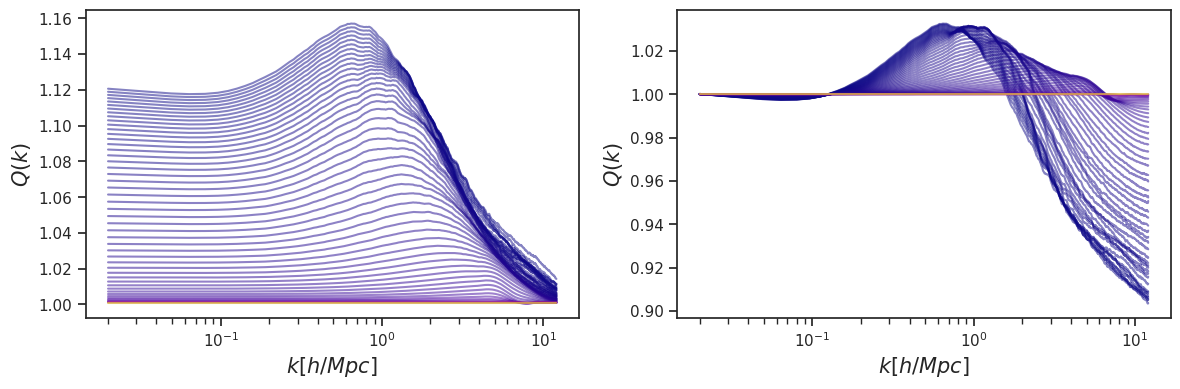

In [6]:
#| hide 

z_index = 0

f, ax = plt.subplots(1, 2, figsize=(14, 4))


f = plot_lines_with_param_color(z_all, 
                            k_all, 
                            Bk_all[16, :, :],
                            'Training data', 
                            r'$k [h/Mpc]$', 
                            r'$Q(k)$', 
                            'redshift',
                            ax=ax[0]);

f = plot_lines_with_param_color(z_all, 
                            k_all, 
                            Bk_all[16, :, :]/Bk_lin_all[16, :, :],
                            'Training data', 
                            r'$k [h/Mpc]$', 
                            r'$Q(k)$', 
                            'redshift',
                            ax=ax[1]);

### Training involves: PCA, GP fitting.  

In [7]:
## Data prep
z_index = 1
# y_vals = Bk_all[:, z_index, :]/Bk_lin_all[:, z_index, :] ## For Q
y_vals = Bk_all[:, z_index, :] ## for B
# y_ind = np.arange(0, y_vals.shape[1])
y_ind = k_all

# Train-test split
test_indices = [0, 14, 35]
input_params= p_all[test_indices]
# target_vals = Bk_all[:, z_index, :][test_indices]/Bk_lin_all[:, z_index, :][test_indices] ## For Q
target_vals = Bk_all[:, z_index, :][test_indices]

# Load validation data

# Bk_all_val, _, _ = load_boost_data(LIBRARY_BK_FILE_VAL, LIBRARY_ZK_FILE_VAL)
# target_vals = Bk_all_val[:, z_index, :]/Bk_all_val[:, z_index, :]
# input_params = load_params(LIBRARY_PARAM_FILE_VAL)

train_indices = [i for i in  np.arange(49)] # if i not in test_indices]
p_all_train = p_all[train_indices]
# y_vals_train = Bk_all[:, z_index, :][train_indices]/Bk_lin_all[:, z_index, :][train_indices] ## For Q
y_vals_train = Bk_all[:, z_index, :][train_indices]

print('Redshift: ' + str(z_all[z_index]))

Redshift: 0.02


This SepiaData instance implies the following:
This is a simulator (eta)-only model, y dimension 768
m  =    49 (number of simulated data)
p  =     1 (number of inputs)
q  =     5 (number of additional simulation inputs)
pu NOT SET (transformed response dimension); call method create_K_basis 

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.96it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.29618511 0.28182576]
 [0.06264867 0.28892078]
 [0.06644168 0.78271913]
 [0.06836456 0.67514676]
 [0.11696153 0.58964045]
 [1.0536187  0.71999387]]
lamUz
[[1.02772964 1.12454601]]
lamWs
[[ 509.84613587 1861.21206153]]
lamWOs
[[14.1089016]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 151.10it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index1.pkl
No thetas to plot


(None, <Figure size 1000x750 with 5 Axes>)

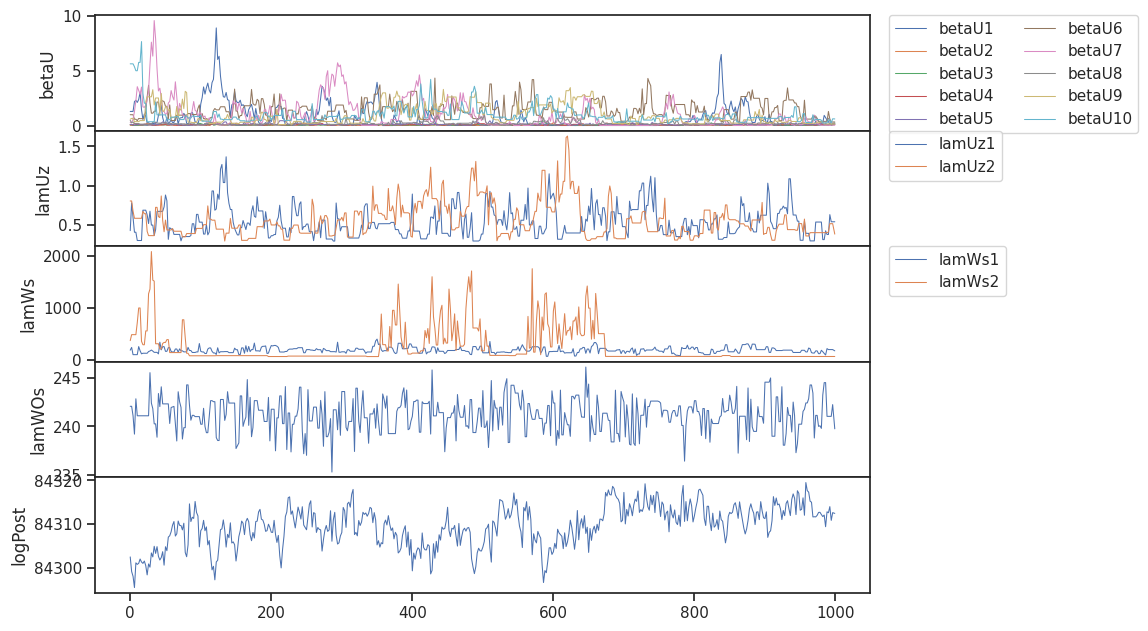

In [8]:
sepia_data = sepia_data_format(p_all_train, y_vals_train, y_ind)
# sepia_data = sepia_data_by_redshift(redshift=0.01)

print(sepia_data)
model_filename = '../CubicGalileonEmu/model/multivariate_model_z_index' + str(z_index) 

# sepia_model = do_pca(sepia_data, exp_variance=0.95)
sepia_model = do_pca(sepia_data, exp_variance=0.95)

sepia_model = do_gp_train(sepia_model, model_filename)
plot_train_diagnostics(sepia_model)

### Load existing model

In [9]:
sepia_model = gp_load(sepia_model, model_filename)

### Single-redshift emulation for new cosmological parameters

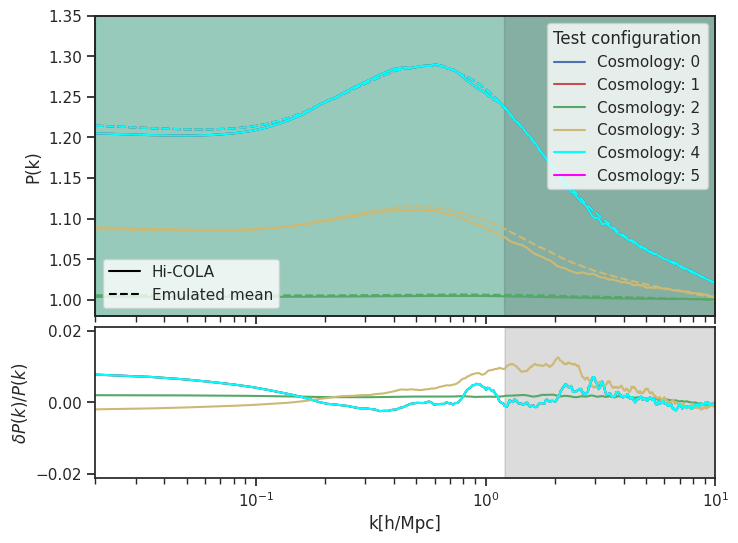

In [10]:
test_indices_rand = np.random.randint(size=5, low=0, high=input_params.shape[0])
pred_mean, pred_std = emulate(sepia_model, sepia_data, input_params[test_indices_rand])
# pred_quant == Emulated (0.05, 0.95) quantile
f = validation_plot(k_all, target_vals[test_indices_rand], pred_mean, pred_std, xy_lims=[2e-2, 1e1, 0.98, 1.35]);
# f = validation_plot(k_all, target_vals[test_indices_rand], pred_mean, pred_std, xy_lims=[2e-2, 1e1, 0.9, 1.1]);

f.savefig('/home/nramachandra/Projects/MG_emu/Plots/emu.pdf', bbox_inches='tight')

### Sensitivity analysis from the emulator 

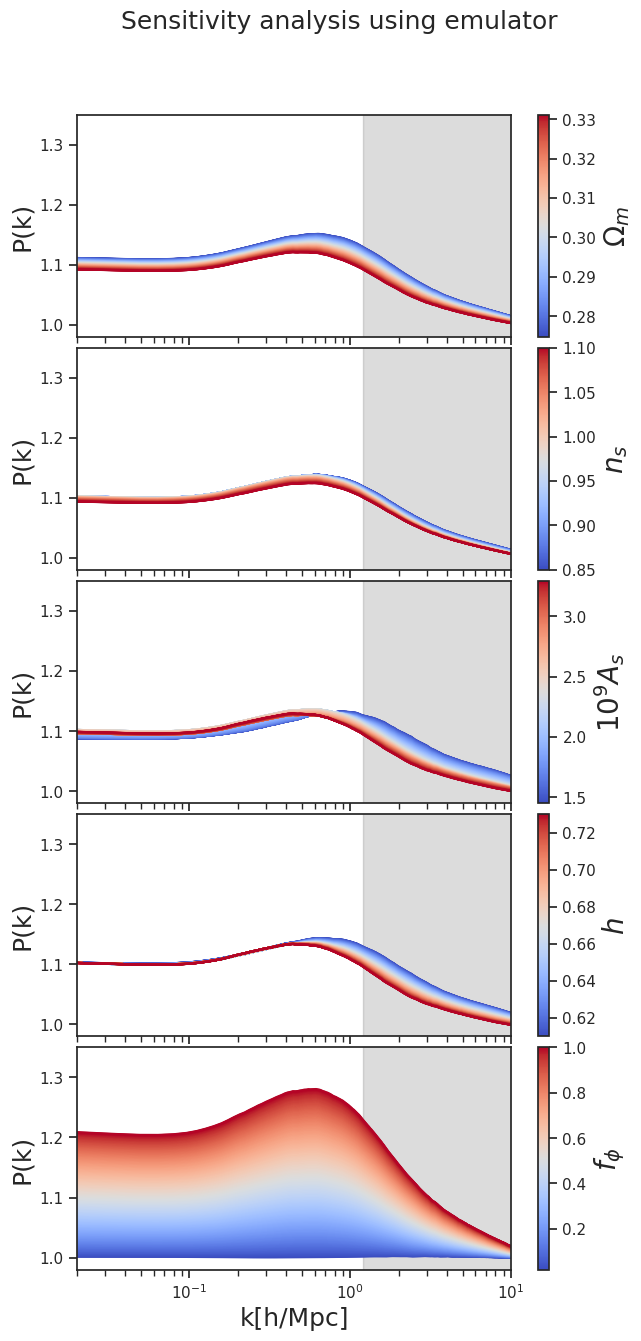

In [11]:
f = sensitivity_plot(k_all, p_all, sepia_model, sepia_data, emulate, PARAM_NAME, xy_lims=[2e-2, 1e1, 0.98, 1.35]);
# f = sensitivity_plot(k_all, p_all, sepia_model, sepia_data, emulate, PARAM_NAME, xy_lims=[2e-2, 1e1, 0.9, 1.1]); ## for Q(k)

### Multi-redshift emulation

#### Train all the models

In [12]:
if if_train_all:
    
    do_gp_train_multiple(model_dir='../CubicGalileonEmu/model/', 
                        p_train_all = p_all[train_indices],
                        y_vals_all = Bk_all[train_indices]/Bk_lin_all[train_indices],
                        y_ind_all = k_all,
                        z_index_range=range(49))

Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.02it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.17257822 2.99109386]
 [0.0131694  0.86975878]
 [0.03230797 1.97233026]
 [0.09268095 1.88848662]
 [0.05962612 1.72814494]
 [0.60973402 1.12471101]]
lamUz
[[1.24041019 1.3590833 ]]
lamWs
[[ 814.74500456 3611.43563983]]
lamWOs
[[27.49103076]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 156.69it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index0.pkl
Training complete for snapshot 0
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.91it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[2.38804479 0.22038613]
 [0.01663811 1.39702886]
 [0.04739278 1.50766381]
 [0.08148464 1.79492761]
 [0.07446049 1.50903062]
 [0.70054167 2.1856238 ]]
lamUz
[[0.98826968 1.24271554]]
lamWs
[[1257.11287305 3452.15772529]]
lamWOs
[[24.63898402]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 160.26it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index1.pkl
Training complete for snapshot 1
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.99it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[1.13924577 1.63090476]
 [0.01271367 0.61642348]
 [0.0452263  1.75411411]
 [0.08790242 1.59606376]
 [0.07668435 1.40536019]
 [0.75174767 1.30656573]]
lamUz
[[0.80653501 1.39626657]]
lamWs
[[ 778.90911723 3260.84488572]]
lamWOs
[[29.41838686]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 152.36it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index2.pkl
Training complete for snapshot 2
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.02it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.68144131 0.2574191 ]
 [0.01262067 0.76464532]
 [0.0550393  1.042839  ]
 [0.10110565 1.44684271]
 [0.07587195 1.43462305]
 [0.70427342 1.66305445]]
lamUz
[[1.21146989 1.26716173]]
lamWs
[[ 702.99994824 3946.53706766]]
lamWOs
[[21.32294433]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 152.63it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index3.pkl
Training complete for snapshot 3
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.96it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.33680851 0.26289074]
 [0.00917009 0.62699423]
 [0.05678434 0.96723041]
 [0.12959905 0.89763738]
 [0.08629512 1.69381936]
 [0.63208822 1.29641925]]
lamUz
[[1.4190476  1.48768951]]
lamWs
[[ 565.21128053 4475.91506232]]
lamWOs
[[25.69157085]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 150.74it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index4.pkl
Training complete for snapshot 4
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.03it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.1537219  0.28076029]
 [0.00865383 0.63128107]
 [0.04717046 0.53017515]
 [0.15257193 0.74388853]
 [0.06207345 1.62642339]
 [0.74394012 0.94408871]]
lamUz
[[1.01100026 1.33858264]]
lamWs
[[ 910.12802203 5478.3170151 ]]
lamWOs
[[29.07088905]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 149.50it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index5.pkl
Training complete for snapshot 5
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.98it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.33765416 0.24395015]
 [0.0102284  1.13049357]
 [0.06268386 0.59302733]
 [0.12493703 0.59138569]
 [0.0976763  2.25373433]
 [0.5024565  1.3784874 ]]
lamUz
[[1.3233924  1.35071004]]
lamWs
[[1068.03920661 4523.12130083]]
lamWOs
[[22.39908662]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 153.30it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index6.pkl
Training complete for snapshot 6
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.98it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.26992564 0.19154231]
 [0.016382   0.59840761]
 [0.0476743  0.44904567]
 [0.11191252 0.43111478]
 [0.06968111 1.4636726 ]
 [0.56413272 1.15382814]]
lamUz
[[1.27159855 1.518612  ]]
lamWs
[[1207.10629749 5032.20739621]]
lamWOs
[[26.75332471]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 146.01it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index7.pkl
Training complete for snapshot 7
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.02it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.26050323 1.09406646]
 [0.0318957  0.43886028]
 [0.024527   0.35542958]
 [0.10118108 0.40280151]
 [0.08419375 1.11542914]
 [0.73993635 0.77658843]]
lamUz
[[1.28192454 1.38504092]]
lamWs
[[1638.74544836 4210.85740594]]
lamWOs
[[25.802819]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 146.40it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index8.pkl
Training complete for snapshot 8
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.02it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.35761019 0.3758306 ]
 [0.03840764 0.80077887]
 [0.02304954 0.32592804]
 [0.08173811 0.96781302]
 [0.09191251 1.05936973]
 [0.71213901 1.71391049]]
lamUz
[[1.31606878 1.20450707]]
lamWs
[[1792.99632501 3510.58546364]]
lamWOs
[[25.44872126]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 157.56it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index9.pkl
Training complete for snapshot 9
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.09it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.19543081 0.08081294]
 [0.04716712 0.81761242]
 [0.02377186 0.2935311 ]
 [0.07729998 0.91510262]
 [0.0781888  0.86232297]
 [0.44066677 1.05733998]]
lamUz
[[0.90210167 1.12219246]]
lamWs
[[1661.03079993 3901.64675917]]
lamWOs
[[29.99688522]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 142.65it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index10.pkl
Training complete for snapshot 10
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.98it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.41368422 1.64175907]
 [0.03211402 0.91322707]
 [0.03975915 0.1420389 ]
 [0.07874899 0.59910347]
 [0.08877554 0.71937846]
 [0.42145877 1.02014548]]
lamUz
[[1.11961464 1.18781039]]
lamWs
[[1378.56767951 2074.02272372]]
lamWOs
[[28.45097942]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 147.14it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index11.pkl
Training complete for snapshot 11
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.03it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.52506415 0.17743408]
 [0.02522422 0.87215884]
 [0.03725976 0.22942074]
 [0.08170717 0.85002759]
 [0.05396    1.05665758]
 [0.39300135 1.01221847]]
lamUz
[[1.0385764  1.17056933]]
lamWs
[[1319.48621464 2715.84817308]]
lamWOs
[[27.17287185]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 146.41it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index12.pkl
Training complete for snapshot 12
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.99it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[1.95468377 0.25707111]
 [0.01692686 0.55870612]
 [0.03271956 0.22362444]
 [0.08632424 0.79532822]
 [0.07592069 0.95682771]
 [0.57075348 0.59653716]]
lamUz
[[0.82198788 1.48022879]]
lamWs
[[1144.44539887 4194.87599148]]
lamWOs
[[24.85358307]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 145.86it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index13.pkl
Training complete for snapshot 13
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.00it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.53947647 0.51011361]
 [0.01159968 0.56892066]
 [0.02886285 0.33873111]
 [0.0943702  0.90162778]
 [0.06836362 0.74379907]
 [0.38089419 0.65707289]]
lamUz
[[0.56133608 1.06769778]]
lamWs
[[2887.0823912  3792.17035072]]
lamWOs
[[29.82213053]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.22it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index14.pkl
Training complete for snapshot 14
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.07it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.30870352 1.13990612]
 [0.01013526 0.15290862]
 [0.04194071 0.20392921]
 [0.09432063 0.72196419]
 [0.062653   0.52845869]
 [0.45225379 0.788825  ]]
lamUz
[[0.65969169 0.8125861 ]]
lamWs
[[2699.77146431 3662.28324557]]
lamWOs
[[30.82351411]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.32it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index15.pkl
Training complete for snapshot 15
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.07it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.53977779 0.11603626]
 [0.01500929 0.19705455]
 [0.05190502 0.24748837]
 [0.0951999  0.60641006]
 [0.10978022 0.46305303]
 [0.59777262 0.57687769]]
lamUz
[[0.93973024 0.77333643]]
lamWs
[[2147.11633247 2498.28257531]]
lamWOs
[[37.6389528]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 147.37it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index16.pkl
Training complete for snapshot 16
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.00it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.75538928 0.43793574]
 [0.01943392 0.17962366]
 [0.05031414 0.19988178]
 [0.10922169 0.5114316 ]
 [0.11525264 0.42698188]
 [0.42893448 0.39969852]]
lamUz
[[0.89486301 0.67416077]]
lamWs
[[2757.92112302 4068.09903686]]
lamWOs
[[29.13156807]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 140.23it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index17.pkl
Training complete for snapshot 17
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.10it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.21969523 0.24841998]
 [0.00661803 0.16754605]
 [0.04622516 0.17826429]
 [0.12760302 0.42771367]
 [0.1000925  0.40417371]
 [0.37782101 0.41819552]]
lamUz
[[0.78172402 0.64062601]]
lamWs
[[2644.71168072 3314.44707911]]
lamWOs
[[29.30885832]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 140.61it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index18.pkl
Training complete for snapshot 18
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.06it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.35104163 0.60936395]
 [0.00999821 0.1667392 ]
 [0.03631392 0.12757834]
 [0.13910864 0.4398914 ]
 [0.12374002 0.29517897]
 [0.53035549 0.39715339]]
lamUz
[[0.8960605  0.68131894]]
lamWs
[[3405.64058492 1689.99568033]]
lamWOs
[[25.30797129]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.02it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index19.pkl
Training complete for snapshot 19
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.10it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.40045698 0.81923583]
 [0.07045966 0.14660225]
 [0.04288015 0.119457  ]
 [0.11562826 0.41550227]
 [0.11576774 0.28678887]
 [0.33433187 0.51839491]]
lamUz
[[0.94206316 0.58035903]]
lamWs
[[4588.48792115 1489.32412558]]
lamWOs
[[24.99551053]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 141.76it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index20.pkl
Training complete for snapshot 20
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.11it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.52651285 0.31097872]
 [0.05672471 0.25294988]
 [0.04766234 0.11901141]
 [0.12072334 0.33919905]
 [0.09027625 0.27589747]
 [0.37854588 0.42201766]]
lamUz
[[0.65009263 0.64094279]]
lamWs
[[4625.48367875 1750.05776515]]
lamWOs
[[20.27435775]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 145.09it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index21.pkl
Training complete for snapshot 21
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:06<00:00,  7.15it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.46363626 0.05268708]
 [0.0270603  0.10559729]
 [0.065902   0.09432212]
 [0.12870831 0.39267019]
 [0.12369066 0.23419296]
 [0.3543077  0.46823101]]
lamUz
[[0.9154946  0.52882648]]
lamWs
[[3238.72478391 1599.84707259]]
lamWOs
[[16.37764172]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.46it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index22.pkl
Training complete for snapshot 22
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.92it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.82896587 1.33165117]
 [0.05560254 0.15897738]
 [0.04287226 0.2013215 ]
 [0.11260142 0.37460812]
 [0.12989753 0.25047387]
 [0.29753156 0.41987066]]
lamUz
[[0.67082585 0.84549842]]
lamWs
[[3293.82273915 1648.45523826]]
lamWOs
[[15.58951419]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 145.38it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index23.pkl
Training complete for snapshot 23
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.11it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.09538702 1.69267821]
 [0.08024303 0.13278117]
 [0.04474081 0.14289658]
 [0.1319912  0.3754131 ]
 [0.08484329 0.23363971]
 [0.31790446 0.48707263]]
lamUz
[[0.58352604 0.49399745]]
lamWs
[[4832.47915519 2295.87824923]]
lamWOs
[[13.64976332]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.67it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index24.pkl
Training complete for snapshot 24
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:06<00:00,  7.18it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.1830818  0.33100754]
 [0.01733223 0.10025079]
 [0.04816737 0.13011048]
 [0.16587187 0.27416684]
 [0.12076606 0.17901262]
 [0.43822382 0.43467352]]
lamUz
[[0.50922192 0.4285187 ]]
lamWs
[[3031.09521885 2081.10831834]]
lamWOs
[[13.7738012]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 142.41it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index25.pkl
Training complete for snapshot 25
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.13it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.59466753 0.4917153 ]
 [0.02119592 0.11296126]
 [0.04968932 0.13410556]
 [0.13166015 0.26521798]
 [0.12058069 0.21867594]
 [0.32023398 0.44917106]]
lamUz
[[0.49137358 0.39226483]]
lamWs
[[4373.23559534 4292.94045798]]
lamWOs
[[13.86236385]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.54it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index26.pkl
Training complete for snapshot 26
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.08it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.38051523 0.31363736]
 [0.07180843 0.17760558]
 [0.05743551 0.13529276]
 [0.11140099 0.24583286]
 [0.11303889 0.19343247]
 [0.31427887 0.5854411 ]]
lamUz
[[0.64433615 0.5624348 ]]
lamWs
[[4163.02009811 1988.38033854]]
lamWOs
[[16.38376921]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.32it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index27.pkl
Training complete for snapshot 27
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.09it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.23971783 0.84149195]
 [0.04874167 0.16657187]
 [0.07108103 0.19894386]
 [0.1313268  0.25504303]
 [0.12713394 0.19464671]
 [0.27406241 0.43255741]]
lamUz
[[0.6533196  0.41592158]]
lamWs
[[4426.35612354 2487.58851485]]
lamWOs
[[15.75123898]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.70it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index28.pkl
Training complete for snapshot 28
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.08it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.11368393 0.68227879]
 [0.06530172 0.16356914]
 [0.05560846 0.09685164]
 [0.1615356  0.34938941]
 [0.12596068 0.1860182 ]
 [0.35504661 0.50422164]]
lamUz
[[0.42940966 0.48874045]]
lamWs
[[3551.824541   3104.53540159]]
lamWOs
[[19.27318703]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 143.84it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index29.pkl
Training complete for snapshot 29
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.11it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.52092181 0.60115687]
 [0.05340177 0.17142237]
 [0.06772059 0.11284771]
 [0.22824478 0.27199576]
 [0.17797227 0.18978186]
 [0.34146139 0.38665952]]
lamUz
[[0.46983019 0.39481614]]
lamWs
[[3270.34365474 5113.63493731]]
lamWOs
[[16.38982632]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.14it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index30.pkl
Training complete for snapshot 30
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.02it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.41684936 1.59102424]
 [0.05362978 0.10730315]
 [0.06212006 0.12688354]
 [0.17973438 0.23894012]
 [0.19831599 0.19477642]
 [0.31374606 0.36728102]]
lamUz
[[0.60210558 0.61618483]]
lamWs
[[3428.29930067 5062.50236217]]
lamWOs
[[17.08874286]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 144.61it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index31.pkl
Training complete for snapshot 31
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.11it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.13316111 0.57172294]
 [0.03367235 0.09856645]
 [0.05345737 0.10205418]
 [0.18021895 0.19302561]
 [0.22217151 0.17730743]
 [0.32320335 0.35131036]]
lamUz
[[0.54064842 0.39817148]]
lamWs
[[4269.73112305 4845.30883803]]
lamWOs
[[13.03957515]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 140.57it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index32.pkl
Training complete for snapshot 32
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.02it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.42240566 1.22045472]
 [0.03803573 0.10287894]
 [0.0862878  0.09683115]
 [0.2383343  0.23407064]
 [0.2980625  0.14566158]
 [0.42968083 0.37939901]]
lamUz
[[0.79465421 0.44204757]]
lamWs
[[3705.0227861  4938.97733526]]
lamWOs
[[12.02652341]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 143.42it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index33.pkl
Training complete for snapshot 33
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.06it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.37167833 0.89257144]
 [0.0258102  0.1201752 ]
 [0.09470609 0.09599829]
 [0.27602918 0.17907882]
 [0.30618368 0.1643458 ]
 [0.53444963 0.41466896]]
lamUz
[[1.08875861 0.38647489]]
lamWs
[[3264.24507845 4257.55515601]]
lamWOs
[[11.71274508]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 142.22it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index34.pkl
Training complete for snapshot 34
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.13it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.58105732 0.60286601]
 [0.12088926 0.09186563]
 [0.09684187 0.12163821]
 [0.0438204  0.31140168]
 [0.05125152 0.38783655]
 [0.4224572  0.41984769]]
lamUz
[[0.72730471 0.72037181]]
lamWs
[[3271.34482782 3469.85653333]]
lamWOs
[[9.29557769]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 142.79it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index35.pkl
Training complete for snapshot 35
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:10<00:00,  4.55it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.32378704 0.15988703 0.34713876]
 [0.09767923 0.11881738 1.43927394]
 [0.07516541 0.17032951 1.56484618]
 [0.07177638 0.37956406 1.28628929]
 [0.06705939 0.41136754 0.97734455]
 [0.50529224 0.46952626 1.51649107]]
lamUz
[[0.5076761  0.8506746  1.31726707]]
lamWs
[[4822.21135624 4180.14318241 4142.64112702]]
lamWOs
[[36.50987242]]


MCMC sampling: 100%|██████████| 1000/1000 [00:10<00:00, 95.39it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index36.pkl
Training complete for snapshot 36
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:11<00:00,  4.52it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.2224131  0.41827243 0.48243747]
 [0.0787464  0.10327685 1.23753819]
 [0.07102279 0.25604405 0.93475991]
 [0.04429161 0.34200948 1.44066264]
 [0.06203095 0.35867533 1.31847584]
 [0.68680472 0.47594641 1.54476223]]
lamUz
[[0.53682777 0.74604087 1.29859699]]
lamWs
[[4493.77218746 4607.98132423 4856.82427398]]
lamWOs
[[28.47803127]]


MCMC sampling: 100%|██████████| 1000/1000 [00:10<00:00, 95.39it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index37.pkl
Training complete for snapshot 37
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:11<00:00,  4.53it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.31180392 0.24732076 3.11729563]
 [0.07903698 0.17863666 1.05042039]
 [0.08556861 0.25722337 0.89484704]
 [0.06213388 0.36183695 1.02244927]
 [0.06513443 0.38412883 1.22988736]
 [0.57956945 0.57782117 1.1193074 ]]
lamUz
[[0.82618984 1.05821989 1.27917066]]
lamWs
[[3442.43009967 4460.0693088  4134.55305812]]
lamWOs
[[33.7041561]]


MCMC sampling: 100%|██████████| 1000/1000 [00:10<00:00, 96.01it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index38.pkl
Training complete for snapshot 38
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:11<00:00,  4.53it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.76304139 0.165503   0.36909229]
 [0.06592157 0.21081288 0.64963309]
 [0.0502146  0.22651092 0.59402925]
 [0.05230966 0.5333549  0.9498748 ]
 [0.07907783 0.48130314 1.08689046]
 [0.69863564 0.51430586 0.7808472 ]]
lamUz
[[0.87953708 0.92358506 0.86766461]]
lamWs
[[2496.26914694 4262.47881666 3714.114387  ]]
lamWOs
[[30.82067356]]


MCMC sampling: 100%|██████████| 1000/1000 [00:10<00:00, 92.78it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index39.pkl
Training complete for snapshot 39
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:10<00:00,  4.56it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[1.17590645 0.62216379 0.07424084]
 [0.08715213 0.29578426 0.37386309]
 [0.0442731  0.29978795 0.38083491]
 [0.11132186 0.60144948 0.91382267]
 [0.12757808 0.55356891 0.76066407]
 [0.58563634 0.62797952 0.59970782]]
lamUz
[[0.91021209 0.497816   0.69517406]]
lamWs
[[1580.38171149 4564.66237204 4539.51704214]]
lamWOs
[[26.28708754]]


MCMC sampling: 100%|██████████| 1000/1000 [00:10<00:00, 92.08it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index40.pkl
Training complete for snapshot 40
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:11<00:00,  4.50it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.96252117 0.72048478 1.21222828]
 [0.09611328 0.6247746  0.16295665]
 [0.09025924 0.43042913 0.32796415]
 [0.23097519 1.08103908 0.3860022 ]
 [0.13603662 0.96098812 0.42025942]
 [0.51911003 0.88101128 0.48028482]]
lamUz
[[1.05902797 0.78478134 1.20490095]]
lamWs
[[2100.15393696 4757.06240768 4893.10957606]]
lamWOs
[[34.61944777]]


MCMC sampling: 100%|██████████| 1000/1000 [00:10<00:00, 94.98it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index41.pkl
Training complete for snapshot 41
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:11<00:00,  4.51it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.56143717 0.75574359 0.87283321]
 [0.11210539 0.24436019 0.58111026]
 [0.11496691 0.26534161 0.54048734]
 [0.2040715  0.7877197  0.99086688]
 [0.12036158 0.6069569  0.90315943]
 [0.41934192 0.4996185  0.7745631 ]]
lamUz
[[1.50648147 0.59356298 0.97135364]]
lamWs
[[3722.87422647 3509.80991504 4288.21900434]]
lamWOs
[[31.89978821]]


MCMC sampling: 100%|██████████| 1000/1000 [00:10<00:00, 93.76it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index42.pkl
Training complete for snapshot 42
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamUz
[[5. 5. 5.]]
lamWs
[[100. 100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:11<00:00,  4.53it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.20468196 1.5109365  0.44141034]
 [0.07238276 0.18458785 0.55327004]
 [0.09362121 0.19955081 0.78837019]
 [0.19148716 0.45874198 0.89330056]
 [0.10912041 0.42734017 1.06045732]
 [0.38445513 0.38566824 1.12469017]]
lamUz
[[1.1695768  0.66352169 1.00401724]]
lamWs
[[5220.46244328 4657.73214805 4444.79564387]]
lamWOs
[[55.6716942]]


MCMC sampling: 100%|██████████| 1000/1000 [00:10<00:00, 93.34it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index43.pkl
Training complete for snapshot 43
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  6.97it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.72395196 1.22019083]
 [0.04333027 0.12954719]
 [0.08095813 0.15942637]
 [0.18551046 0.40782558]
 [0.10839746 0.35521326]
 [0.30242691 0.3295899 ]]
lamUz
[[0.73523654 0.93758656]]
lamWs
[[5535.49855039 4799.08743744]]
lamWOs
[[8.60666767]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 140.86it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index44.pkl
Training complete for snapshot 44
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.10it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.17522751 0.05727931]
 [0.04058382 0.10374414]
 [0.05022166 0.12932612]
 [0.16987064 0.32554316]
 [0.1056604  0.26571511]
 [0.4254009  0.31620432]]
lamUz
[[1.00874625 0.46772239]]
lamWs
[[5176.09530201 4683.05814877]]
lamWOs
[[11.29308374]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 139.61it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index45.pkl
Training complete for snapshot 45
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:06<00:00,  7.20it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.43984517 0.36494838]
 [0.04104364 0.07447271]
 [0.03165901 0.09035914]
 [0.09526455 0.21334494]
 [0.05397136 0.19217374]
 [0.36664207 0.31636625]]
lamUz
[[0.88216969 0.32587485]]
lamWs
[[5420.76245891 4579.6525757 ]]
lamWOs
[[10.52414557]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 140.39it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index46.pkl
Training complete for snapshot 46
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:06<00:00,  7.20it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.15593057 0.5336377 ]
 [0.04384164 0.07593066]
 [0.01435611 0.08866912]
 [0.09943385 0.21068239]
 [0.06086111 0.20475805]
 [0.42238608 0.26653928]]
lamUz
[[1.03679445 0.3439573 ]]
lamWs
[[2996.82435624 5219.74976139]]
lamWOs
[[14.99753595]]


MCMC sampling: 100%|██████████| 1000/1000 [00:07<00:00, 142.38it/s]


Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index47.pkl
Training complete for snapshot 47
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Starting tune_step_sizes...
Default step sizes:
betaU
[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]]
lamUz
[[5. 5.]]
lamWs
[[100. 100.]]
lamWOs
[[100.]]


Step size tuning: 100%|██████████| 50/50 [00:07<00:00,  7.11it/s]


Done with tune_step_size.
Selected step sizes:
betaU
[[0.51964513 1.11134667]
 [0.05788669 0.06150468]
 [0.03085083 0.11104645]
 [0.15620124 0.17003593]
 [0.12531276 0.19208247]
 [0.48307426 0.33148797]]
lamUz
[[0.93881927 0.51942815]]
lamWs
[[1673.66775562 6071.53787061]]
lamWOs
[[9.45348869]]


MCMC sampling: 100%|██████████| 1000/1000 [00:06<00:00, 143.18it/s]

Model saved to ../CubicGalileonEmu/model/multivariate_model_z_index48.pkl
Training complete for snapshot 48
Model saved at ../CubicGalileonEmu/model/
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*


#### Load all trained models 

In [ ]:
sepia_model_list, sepia_data_list = load_model_multiple(model_dir='../CubicGalileonEmu/model/', 
                                        p_train_all=p_all[train_indices],
                                        y_vals_all=Bk_all[train_indices]/Bk_lin_all[train_indices],
                                        y_ind_all=k_all,
                                        z_index_range=range(49), 
                                        sepia_model_i=sepia_model)

Number of models loaded: 49
[[0.31051392 1.085      2.541      0.67373333 0.480012   0.1       ]]
[[0.31051392 1.085      2.541      0.67373333 0.480012   0.1       ]]


In [ ]:
#| hide

#### Emulator uncertainty across parameter range


input_params0 = input_params[0]
z_inputs = 0.1
input_params_and_redshift = np.append(input_params0, z_inputs)
print(input_params_and_redshift[np.newaxis, :])

# sepia_data_select = sepia_data_by_redshift(redshift=z_inputs)
# sepia_data_select1 = sepia_data_by_redshift(redshift=z_all[2])
# sepia_data_select2 = sepia_data_by_redshift(redshift=z_all[3])

sepia_data_select = sepia_data_list[23]
sepia_data_select1 = sepia_data_list[22]
sepia_data_select2 = sepia_data_list[24]

emulated_with_redshift, emulated_with_redshift_err = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, sepia_data_list, z_all)
## There is an unknown issue with z_index=5 model, (sepia_model_list[6])
# emulate(sepia_model_list[6], sepia_data_select, input_params_and_redshift[:-1])[0]

plt.figure(433)
plt.plot(k_all, emulated_with_redshift[:, 0], label='interp at z=%.4f'%input_params_and_redshift[-1], lw=5, ls='--')
plt.plot(k_all, emulate(sepia_model_list[0], sepia_data_select1, input_params_and_redshift[:-1])[0], label='grid z=%.4f'%z_all[2])
plt.plot(k_all, emulate(sepia_model_list[1], sepia_data_select2, input_params_and_redshift[:-1])[0], label='grid z=%.4f'%z_all[3])
plt.legend()
plt.title('Comparison of redshift-space interpolation')
# plt.plot(k_all, emulate(sepia_model_list[0], input_params))
# plt.plot(k_all, emulate(sepia_model_list[0], input_params))

plt.show()

ValueError: cannot reshape array of size 12 into shape (6,1)

<Figure size 640x480 with 0 Axes>

#### Emulator confidence across parameter range

In [ ]:
# Parameter settings
steps = 50  # Number of steps in the grid for each parameter
param_name_extended = np.append(PARAM_NAME, 'Redshift')
red_min = 0
red_max = 3
red_mean = 1.0

param_min = np.append(p_all.min(axis=0), red_min)
param_max = np.append(p_all.max(axis=0), red_max)
param_mean = np.append(p_all.mean(axis=0), red_mean)

# Compute outputs and errors for a range of parameter values
def compute_errors(param_grid):
    print(param_grid.shape)
    errors = np.zeros(shape=(param_grid.shape[0], ))
    # errors = np.array([np.mean(emu_redshift(params[np.newaxis, :], sepia_model_list, z_all)[1][:, 0, :]**2) for params in param_grid])
    for par_indx in range(errors.shape[0]):
        emu_pred = np.array(emu_redshift(param_grid[par_indx][np.newaxis, :], sepia_model_list, sepia_data_list, z_all))
        errors_emu = emu_pred[1, :, 0]
        print(errors_emu.shape)

        errors[par_indx] = np.max(errors_emu)
        print(errors_emu)

    return errors.reshape(steps, steps)


# Example usage:
param_indices = [4, 2]  # Indices of parameters to vary
fixed_indices = [i for i in range(len(param_name_extended)) if i not in param_indices]
fixed_params = {param_name_extended[i]: param_mean[i] for i in fixed_indices}

param_grid = generate_param_grid_with_fixed(param_name_extended, param_indices, fixed_params, param_min, param_max, steps)

errors = compute_errors(param_grid)

In [ ]:
f = plot_error_heatmap( errors, 
                       [param_name_extended[i] for i in param_indices], 
                       [(param_min[param_indices[0]], param_max[param_indices[0]]), (param_min[param_indices[1]], param_max[param_indices[1]])]
                       )

if if_savefig: 
    f.savefig('../../../Plots/heatmap_params_4_5.png', bbox_inches='tight')

### Parameter inference via MCMC using the emulator

In [ ]:
#| hide 

ndim = 5
nwalkers = 100  # 500
nrun_burn = 100  # 300
nrun = 700  # 1000

#### Creating mock observational data

In [ ]:
k_all[62]

In [ ]:

target_indx = 0 #0 ,14, 35
z_index = 2
L = 32
fake_obs_data_index_every = 1

redshift = z_all[z_index]
k_cond = k_all < 1
x = k_all[::fake_obs_data_index_every][k_cond]
y = Bk_all[:, z_index, :][target_indx][::fake_obs_data_index_every][k_cond]
y = y + 1e-4*np.random.normal(0.0, 1.0, size=y.shape)
yerr = np.sqrt( Bk_all[:, z_index, :][target_indx][::fake_obs_data_index_every][k_cond]*(L**3))/(L**3)

x_grid = k_all
params_calib = p_all[target_indx][:, np.newaxis].T
print('redshift: ', redshift)

In [ ]:

f, a = plt.subplots(1,1, figsize = (8, 5)) 
input_params_and_redshift = np.append(params_calib, redshift)
bk_target, err_target = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, sepia_data_list, z_all)
a.plot(k_all, bk_target[:, 0], label='Emulated at target params', lw=5, ls='--')
a.errorbar(x, y, yerr, label='Target mock observations', ls='none', lw=1, color = "r")
a.scatter(x, y, s = 5, marker = "h", color = "r")


a.plot(k_all, Bk_all[:, z_index, :].T, 'k', alpha=0.1)


plt.plot(k_all, emulate(sepia_model_list[z_index], sepia_data, input_params_and_redshift[:-1])[0], label='grid z=%.4f'%z_all[z_index])
plt.plot(k_all, emulate(sepia_model_list[z_index+1], sepia_data, input_params_and_redshift[:-1])[0], label='grid z=%.4f'%z_all[z_index + 1])

string_print0 = 'Target Params \n\n' 
string_print1 = PARAM_NAME[0] + '= %.4f'%input_params_and_redshift[0] + '\n'
string_print2 = PARAM_NAME[1] + '= %.4f'%input_params_and_redshift[1] + '\n'
string_print3 = PARAM_NAME[2] + '= %.4f'%input_params_and_redshift[2] + '\n'
string_print4 = PARAM_NAME[3] + '= %.4f'%input_params_and_redshift[3] + '\n'
string_print5 = PARAM_NAME[4] + '= %.4f'%input_params_and_redshift[4] + '\n'
string_print6 = 'redshift' + '= %.4f'%input_params_and_redshift[5] 


string_print = string_print0 + string_print1 + string_print2 + string_print3 + string_print4 + string_print5 + string_print6

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
plt.text(1.02, 0.1, string_print, transform=a.transAxes, fontsize=12, bbox=props)


a.set_xscale('log')
plt.title('pre-MCMC')
a.set_xlabel(r'$k [h/Mpc]$')
a.set_ylabel(r'$B(k)$')
plt.legend()

In [ ]:
#| hide 

allMax = np.max(p_all, axis = 0)
allMin = np.min(p_all, axis = 0)

param1 = [PARAM_NAME[0], params_calib[0][0], allMin[0], allMax[0]] 
param2 = [PARAM_NAME[1], params_calib[0][1], allMin[1], allMax[1]]
param3 = [PARAM_NAME[2], params_calib[0][2], allMin[2], allMax[2]]
param4 = [PARAM_NAME[3], params_calib[0][3], allMin[3], allMax[2]]
param5 = [PARAM_NAME[4], params_calib[0][4], allMin[4], allMax[4]]

params_list = [param1, param2, param3, param4, param5]

In [ ]:
pos0 = chain_init(params_list, ndim, nwalkers)
sampler = define_sampler(redshift, ndim, nwalkers, params_list, x_grid, sepia_model_list, sepia_data_list, z_all, x, y, yerr)

##### MCMC run - first burn, then full. 


In [ ]:

pos, prob, state, samples, sampler, autocorr, index = do_mcmc(sampler, pos0, nrun_burn, ndim, if_burn=True)

if if_mcmc_all: # Full MCMC-run, will be slow
    pos, prob, state, samples, sampler, autocorr, index = do_mcmc(sampler, pos, nrun, ndim, if_burn=False)

p_mcmc = mcmc_results(samples)

fig = plot_mcmc(samples, params_list, if_truth_know=True)
if if_savefig: 
    plt.savefig('../../../Plots/mcmc_plot.png', bbox_inches='tight')

In [ ]:

f, a = plt.subplots(1,1, figsize = (8, 5)) 
input_params_and_redshift = np.append(p_mcmc, redshift)
bk_mcmc, err_mcmc = emu_redshift(input_params_and_redshift[np.newaxis, :], sepia_model_list, sepia_data_list, z_all)
a.plot(k_all, bk_mcmc[:, 0], label='Emulated at best MCMC', lw=3, ls='--')
a.errorbar(x, y, yerr, label='Mock target', ls='none', lw=1, color = "r")
a.scatter(x, y, s = 5, marker = "h", color = "r", alpha=0.5)

a.plot(k_all, Bk_all[:, z_index, :].T, 'k', alpha=0.1)


# plt.plot(k_all, emulate(sepia_model_list[z_index], input_params_and_redshift[:-1])[0], label='Z1')
# plt.plot(k_all, emulate(sepia_model_list[z_index+1], input_params_and_redshift[:-1])[0], label='Z2')

string_print0 = 'Target Params \n\n' 
string_print1 = PARAM_NAME[0] + '= %.3f'%params_calib[0][0] + '\n'
string_print2 = PARAM_NAME[1] + '= %.3f'%params_calib[0][1] + '\n'
string_print3 = PARAM_NAME[2] + '= %.3f'%params_calib[0][2] + '\n'
string_print4 = PARAM_NAME[3] + '= %.3f'%params_calib[0][3] + '\n'
string_print5 = PARAM_NAME[4] + '= %.3f'%params_calib[0][4] + '\n'
string_print6 = 'redshift' + '= %.3f'%redshift


string_print = string_print0 + string_print1 + string_print2 + string_print3 + string_print4 + string_print5 + string_print6

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
plt.text(1.02, 0.5, string_print, transform=a.transAxes, fontsize=12, bbox=props)

string_print0_mcmc = 'Optimized Params \n\n' 
string_print1_mcmc = PARAM_NAME[0] + '= %.3f'%p_mcmc[0] + '\n'
string_print2_mcmc = PARAM_NAME[1] + '= %.3f'%p_mcmc[1] + '\n'
string_print3_mcmc = PARAM_NAME[2] + '= %.3f'%p_mcmc[2] + '\n'
string_print4_mcmc = PARAM_NAME[3] + '= %.3f'%p_mcmc[3] + '\n'
string_print5_mcmc = PARAM_NAME[4] + '= %.3f'%p_mcmc[4] 

string_print_mcmc = string_print0_mcmc + string_print1_mcmc + string_print2_mcmc + string_print3_mcmc + string_print4_mcmc + string_print5_mcmc

props = dict(boxstyle='round', facecolor='blue', alpha=0.2)
plt.text(1.02, 0.05, string_print_mcmc, transform=a.transAxes, fontsize=12, bbox=props)



a.set_xscale('log')
plt.title('B(k) at MCMC constraints')
a.set_xlabel(r'$k [h/Mpc]$')
a.set_ylabel(r'$B(k)$')
plt.legend()

if if_savefig: 
    plt.savefig('../../../Plots/mcmc_results_Bk.png', bbox_inches='tight')


In [ ]:
#| hide


if if_mcmc_all:
    tau = sampler.get_autocorr_time(tol=0)
    print(tau)

    plt.figure(43)
    plt.plot(prob)
    if if_savefig: 
        plt.savefig('../../../Plots/prob_plot.png', bbox_inches='tight')

    selected_indices_for_plot = [0, 2, 4]
    fig = plot_mcmc(samples[:, selected_indices_for_plot], [params_list[i] for i in selected_indices_for_plot], if_truth_know=True)

    if if_savefig: 
        plt.savefig('../../../Plots/mcmc_plot_reduced_params.png', bbox_inches='tight')

In [ ]:
#| hide


def plot_convergence(sampler, params_list, nrun, ndim, nwalkers):
    n_params = len(params_list)  # Number of parameters
    fig, ax = plt.subplots(n_params, 1, figsize=(20, 2 * n_params), sharex=True)
    ax[-1].set_xlabel('steps')

    for i, param in enumerate(params_list):
        ax[i].plot(np.arange(nrun), sampler.chain[:, :, i].T, lw=0.2, alpha=0.9)
        ax[i].text(0.9, 0.9, param[0], horizontalalignment='center', verticalalignment='center', transform=ax[i].transAxes, fontsize=12)

    # fig.savefig('plots/convergence_mcmc_ndim{}_nwalk{}_run{}_{}-{}.png'.format(ndim, nwalkers, nrun, summary_stat, design), dpi=100)

    return fig

if False:
    # Example usage
    plot_convergence(sampler, params_list, nrun, ndim, nwalkers)

In [ ]:
#| hide

if if_mcmc_all:

    n = 100 * np.arange(1, index + 1)
    y = autocorr[:index]
    plt.plot(n, n / 100.0, "--k")
    plt.plot(n, y)
    plt.xlim(0, n.max())
    plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
    plt.xlabel("number of steps")
    plt.ylabel(r"mean $\hat{\tau}$");
    plt.show()

In [ ]:
#| hide

if if_mcmc_all:
    plt.plot(autocorr)
    plt.xscale('log')
    # plt.yscale('log')

In [ ]:
#| hide

### TO-DO

## Redshift sampling is better in the new Validation design -- validate AFTER redshift interpolation
## New heatmap with max errors
## Use smoothing for spectra
## Use Carola's new data
## MCMC with all the accumulated errors
## Add cosmicEmu's P(k) for MCMC
## Carola will try P(k) + cosmic Shear?
## Fisher ellipses?